In [36]:
import pandas as pd
import numpy as np

meth = pd.read_csv("data_methylation_hm450.txt", sep='\t')

genes_used_in_mean_meth_paper = pd.read_csv('all_genes_from_beta_data.txt')
gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

meth['Hugo_Symbol'] = meth['Hugo_Symbol'].str.upper()
gene_list_upper = [gene.upper() for gene in gene_list]

print(f"before: {len(meth)}")
meth = meth[meth['Hugo_Symbol'].isin(gene_list_upper)].reset_index(drop=True)
print(f"after: {len(meth)}")

print(f"list length {len(gene_list)}")

before: 25883
after: 19589
list length 20248


In [37]:
# meth = meth[meth['Hugo_Symbol'] == 'MGMT']


meth

,Hugo_Symbol,Entrez_Gene_Id,Mayo-PDX-Sarkaria-167,Mayo-PDX-Sarkaria-159,Mayo-PDX-Sarkaria-9,Mayo-PDX-Sarkaria-168,Mayo-PDX-Sarkaria-114,Mayo-PDX-Sarkaria-61,Mayo-PDX-Sarkaria-182,Mayo-PDX-Sarkaria-170,...,Mayo-PDX-Sarkaria-43,Mayo-PDX-Sarkaria-44,Mayo-PDX-Sarkaria-56,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-66,Mayo-PDX-Sarkaria-67,Mayo-PDX-Sarkaria-69,Mayo-PDX-Sarkaria-85,Mayo-PDX-Sarkaria-91
0,MAN1B1,11253.0,0.713272,0.846278,0.766221,0.871540,0.707992,0.675131,0.838506,0.847752,...,0.629355,0.651117,0.772536,0.786384,0.852410,0.826622,0.822181,0.725353,0.796867,0.678068
1,GBE1,2632.0,0.285983,0.284535,0.282522,0.237509,0.378794,0.250298,0.268556,0.228314,...,0.295463,0.187003,0.271938,0.276940,0.460299,0.311387,0.289102,0.282737,0.296432,0.403204
2,LOC283050,NaN,0.114177,0.084241,0.037556,0.031451,0.039532,0.033215,0.031714,0.018553,...,0.340190,0.046507,0.036495,0.048216,0.023656,0.033189,0.034726,0.081695,0.024967,0.078415
3,PINK1,65018.0,0.017230,0.031675,0.027787,0.023257,0.063177,0.026458,0.021186,0.024719,...,0.258148,0.056419,0.035809,0.052586,0.039329,0.033387,0.028472,0.046274,0.026302,0.331467
4,LRFN1,57622.0,0.866187,0.936634,0.954676,0.949090,0.952815,0.966313,0.963216,0.813690,...,0.976600,0.972397,0.962182,0.958192,0.958973,0.967308,0.950065,0.961169,0.961680,0.904680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,C4ORF21,NaN,0.120494,0.110013,0.107262,0.117423,0.045677,0.104513,0.090999,0.040732,...,0.223253,0.051463,0.066685,0.104632,0.164933,0.093181,0.081753,0.086159,0.073602,0.218064
19585,ZBTB24,9841.0,0.206413,0.256636,0.236817,0.202623,0.168852,0.167049,0.230845,0.190863,...,0.268181,0.161171,0.230133,0.262357,0.194932,0.180438,0.198012,0.118648,0.057619,0.087173
19586,PTPN12,5782.0,0.087767,0.097772,0.088719,0.101796,0.066737,0.053532,0.076302,0.034641,...,0.059751,0.045944,0.068201,0.102901,0.071068,0.088327,0.108620,0.051452,0.066694,0.104473
19587,PMPCA,23203.0,0.089719,0.226797,0.171147,0.199747,0.267739,0.191046,0.171641,0.140792,...,0.033201,0.057555,0.119498,0.207417,0.096903,0.162093,0.113206,0.136420,0.159153,0.316044


In [38]:
meth = meth.drop(['Hugo_Symbol', 'Entrez_Gene_Id'], axis=1)
means = meth.mean(skipna=True)
means

Mayo-PDX-Sarkaria-167    0.347327
Mayo-PDX-Sarkaria-159    0.309857
Mayo-PDX-Sarkaria-9      0.336261
Mayo-PDX-Sarkaria-168    0.349298
Mayo-PDX-Sarkaria-114    0.399316
                           ...   
Mayo-PDX-Sarkaria-66     0.380073
Mayo-PDX-Sarkaria-67     0.330421
Mayo-PDX-Sarkaria-69     0.358637
Mayo-PDX-Sarkaria-85     0.307415
Mayo-PDX-Sarkaria-91     0.379478
Length: 73, dtype: float64

In [39]:
df = pd.read_csv("PDX_response_to_standard_therapy.csv")
df['PDX_Line'] = ['Mayo-PDX-Sarkaria-'+str(val) for val in df['PDX_Line'].values]
df.head()

,PDX_Line,PDX MGMT,TMZ_Placebo,TMZ,TMZ_Ratio,RT_Placebo,RT,RT_Ratio,RT_and_TMZ_Placebo,RT_and_TMZ,RT_and_TMZ_Ratio,patient_tumor_type,patient_OS,patient_treatment
0,Mayo-PDX-Sarkaria-5,M,54.00,321.00,5.94,54.0,138.5,2.56,54.00,341.00,6.31,Primary,30.8,RT + Carmustine
1,Mayo-PDX-Sarkaria-6,U,41.00,56.00,1.37,41.0,40.5,0.99,41.00,36.50,0.89,Primary,12.6,RT
2,Mayo-PDX-Sarkaria-8,M,58.50,123.50,2.11,58.5,107.0,1.83,58.50,189.00,3.23,Primary,16.1,RT
3,Mayo-PDX-Sarkaria-10,U,41.00,55.00,1.34,41.0,66.0,1.61,41.00,76.00,1.85,Recur/Prog,7.5,Observation
4,Mayo-PDX-Sarkaria-12,M,15.00,53.00,3.53,15.0,37.0,2.47,15.00,85.50,5.70,Primary,2.9,RT


In [40]:
np.median(means.values)

0.34732673727375973

In [41]:
df['mean_methylation'] = [means[pdx] if pdx in means else np.nan for pdx in df['PDX_Line']]
df = df[df['mean_methylation'].notna()]
df

,PDX_Line,PDX MGMT,TMZ_Placebo,TMZ,TMZ_Ratio,RT_Placebo,RT,RT_Ratio,RT_and_TMZ_Placebo,RT_and_TMZ,RT_and_TMZ_Ratio,patient_tumor_type,patient_OS,patient_treatment,mean_methylation
0,Mayo-PDX-Sarkaria-5,M,54.00,321.00,5.94,54.0,138.5,2.56,54.00,341.00,6.31,Primary,30.8,RT + Carmustine,0.283964
1,Mayo-PDX-Sarkaria-6,U,41.00,56.00,1.37,41.0,40.5,0.99,41.00,36.50,0.89,Primary,12.6,RT,0.348290
2,Mayo-PDX-Sarkaria-8,M,58.50,123.50,2.11,58.5,107.0,1.83,58.50,189.00,3.23,Primary,16.1,RT,0.340756
3,Mayo-PDX-Sarkaria-10,U,41.00,55.00,1.34,41.0,66.0,1.61,41.00,76.00,1.85,Recur/Prog,7.5,Observation,0.356086
4,Mayo-PDX-Sarkaria-12,M,15.00,53.00,3.53,15.0,37.0,2.47,15.00,85.50,5.70,Primary,2.9,RT,0.342742
5,Mayo-PDX-Sarkaria-14,U,33.00,186.00,5.64,33.0,55.5,1.68,33.00,188.00,5.70,Recur,4.5,RT + Gefitinib,0.326020
8,Mayo-PDX-Sarkaria-22,M,43.00,154.50,3.59,43.0,43.0,1.00,43.00,325.50,7.57,Primary,2.5,Palliative,0.365767
9,Mayo-PDX-Sarkaria-26,U,82.50,99.50,1.21,82.5,128.5,1.56,82.50,128.50,1.56,Primary,8.7,RT,0.344335
11,Mayo-PDX-Sarkaria-34,U,85.00,351.00,4.13,85.0,156.0,1.84,85.00,391.00,4.60,Primary,10.6,OSI-774/RT,0.322686
12,Mayo-PDX-Sarkaria-36,M,125.50,228.50,1.82,125.5,194.5,1.55,125.50,301.00,2.40,Primary,10.1,RT,0.250679


## Plot division:

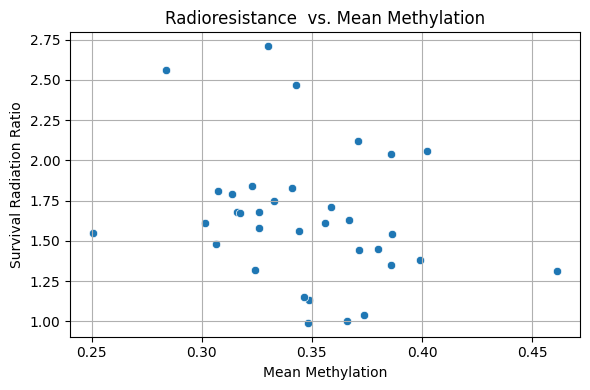

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='mean_methylation', y='RT_Ratio')
plt.title("Radioresistance  vs. Mean Methylation")
plt.xlabel("Mean Methylation")
plt.ylabel("Survival Radiation Ratio")
# plt.legend(title="Class\n(1=Resistant)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
auc_median

1.61

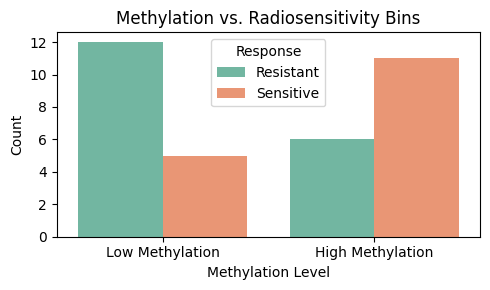

In [56]:
plot_df = df
# Create categorical bins
meth_median = plot_df['mean_methylation'].median()
auc_median = plot_df['RT_Ratio'].median()

plot_df['methylation_bin'] = (plot_df['mean_methylation'] >= meth_median).map({True: 'High Methylation', False: 'Low Methylation'})
plot_df['auc_bin'] = (plot_df['RT_Ratio'] >= auc_median).map({True: 'Resistant', False: 'Sensitive'})

plt.figure(figsize=(5, 3))
sns.countplot(data=plot_df, x='methylation_bin', hue='auc_bin', palette='Set2')
plt.title("Methylation vs. Radiosensitivity Bins")
plt.xlabel("Methylation Level")
plt.ylabel("Count")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


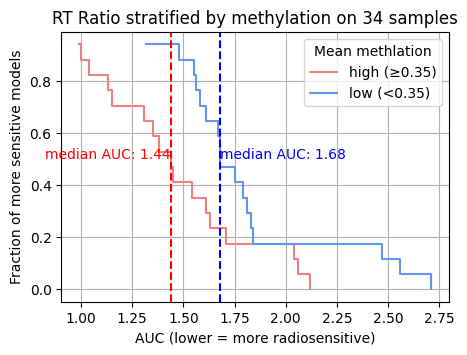

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

therapy = "RT"+"_Ratio"

specific = df


# Example arrays
auc = np.array(specific[therapy].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

threshold = np.median(methylation)
group_high = methylation >= threshold
group_low = methylation < threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(5, 3.5))

plt.step(auc_h, surv_h, where="post", color="lightcoral", label=f"high (≥{threshold:.2f})")
plt.step(auc_l, surv_l, where="post", color="cornflowerblue", label=f"low (<{threshold:.2f})")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="right")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="left")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"RT Ratio stratified by methylation on {len(specific)} samples")
plt.legend(title = "Mean methlation")
plt.grid(True)
plt.show()


## Version with best threshold

## Figure 4.C.

Sensitivity threshold used: 3.23


C:\Users\mmarc\AppData\Local\Temp\ipykernel_18076\3203500448.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sensitivity', y=methyl_col, data=df, palette={'sensitive': 'sandybrown', 'resistant': 'cornflowerblue'}, width=0.5, fliersize=0)


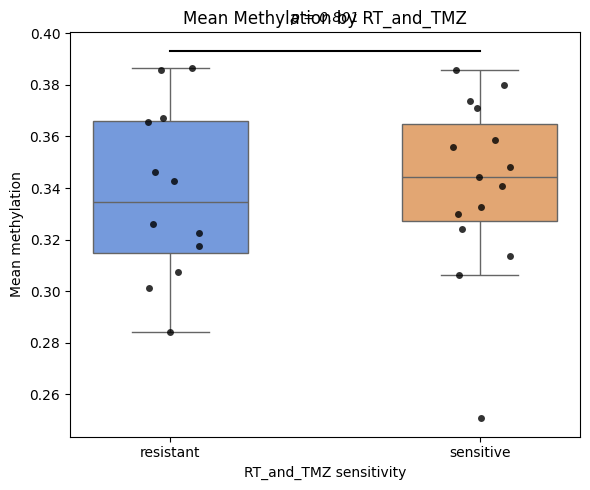

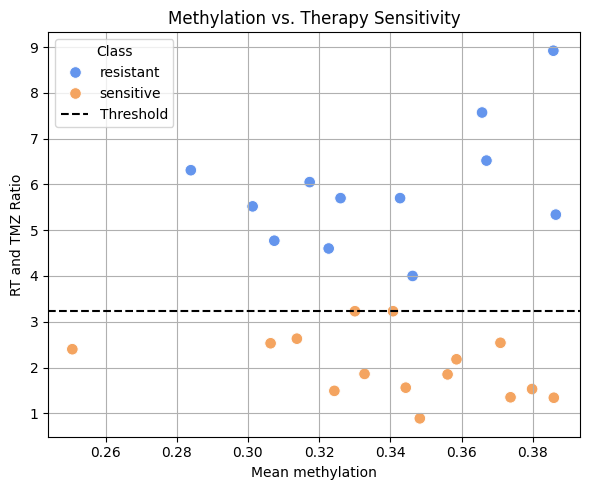

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_methylation_vs_sensitivity(df, therapy_col='RT_Ratio', methyl_col='mean_methylation', threshold=None):
    df = df.copy()

    # Ensure columns are numeric and drop rows with NaNs or non-numeric values
    df[therapy_col] = pd.to_numeric(df[therapy_col], errors='coerce')
    df[methyl_col] = pd.to_numeric(df[methyl_col], errors='coerce')
    df.dropna(subset=[therapy_col, methyl_col], inplace=True)

    # Determine threshold
    if threshold is None:
        threshold = df[therapy_col].median()
    print(f"Sensitivity threshold used: {threshold}")


    # Assign sensitivity class based on threshold
    df = df.copy()
    df['sensitivity'] = np.where(df[therapy_col] <= threshold, 'sensitive', 'resistant')

    # T-test for p-value
    group1 = df[df['sensitivity'] == 'sensitive'][methyl_col]
    group2 = df[df['sensitivity'] == 'resistant'][methyl_col]
    stat, pval = ttest_ind(group1, group2, nan_policy='omit')

    # Plot
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(x='sensitivity', y=methyl_col, data=df, palette={'sensitive': 'sandybrown', 'resistant': 'cornflowerblue'}, width=0.5, fliersize=0)
    sns.stripplot(x='sensitivity', y=methyl_col, data=df, color='black', jitter=True, dodge=True, size=5, alpha=0.8)

    # Annotate p-value
    y_max = df[methyl_col].max()
    y_min = df[methyl_col].min()
    y_line = y_max + (y_max - y_min) * 0.05
    plt.plot([0, 1], [y_line, y_line], color='black')
    plt.text(0.5, y_line + 0.01, f"p = {pval:.3f}", ha='center', va='bottom', fontsize=10, style='italic')

    # Labels
    plt.xlabel(f"{therapy_col[:-6]} sensitivity")
    plt.ylabel("Mean methylation")
    plt.title(f"Mean Methylation by {therapy_col[:-6]}")
    plt.tight_layout()
    plt.show()

        # Scatter plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df,
                    x=methyl_col,
                    y=therapy_col,
                    hue='sensitivity',
                    palette={'sensitive': 'sandybrown', 'resistant': 'cornflowerblue'},
                    s=70)
    plt.axhline(threshold, color='black', linestyle='--', label='Threshold')
    plt.xlabel("Mean methylation")
    plt.ylabel(therapy_col.replace('_', ' '))
    plt.title("Methylation vs. Therapy Sensitivity")
    plt.legend(title='Class')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# therapy_col='RT_Ratio'
plot_methylation_vs_sensitivity(df, therapy_col='RT_and_TMZ_Ratio')

# plot_methylation_vs_sensitivity(df,therapy_col="patient_OS")

MGMT high-low used: 0.3443349992659555


C:\Users\mmarc\AppData\Local\Temp\ipykernel_18076\1447914011.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,


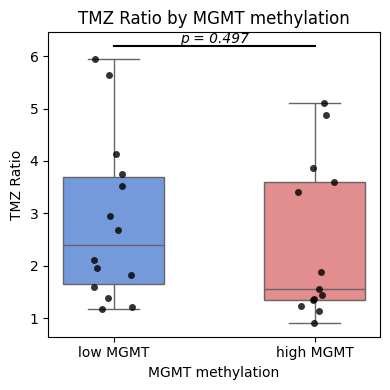

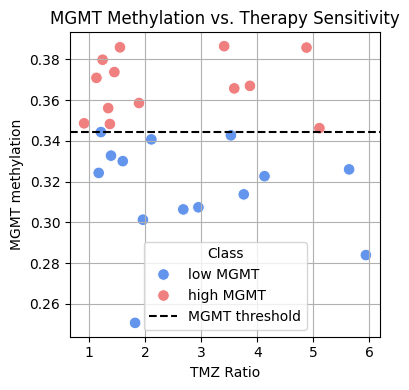

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_sensitivity_vs_methylation(df, therapy_col='RT_Ratio', methyl_col='mean_methylation', threshold=None):
    df = df.copy()

    # Ensure columns are numeric and drop rows with NaNs or non-numeric values
    df[therapy_col] = pd.to_numeric(df[therapy_col], errors='coerce')
    df[methyl_col] = pd.to_numeric(df[methyl_col], errors='coerce')
    df.dropna(subset=[therapy_col, methyl_col], inplace=True)

    # Determine methylation threshold
    if threshold is None:
        threshold = df[methyl_col].median()
    print(f"MGMT high-low used: {threshold}")

    # Assign methylation class based on threshold
    df['sensitivity'] = np.where(df[methyl_col] <= threshold, 'low MGMT', 'high MGMT')

    # T-test for p-value: compare THERAPY values between methylation groups (FIXED)
    group1 = df.loc[df['sensitivity'] == 'low MGMT', therapy_col]
    group2 = df.loc[df['sensitivity'] == 'high MGMT', therapy_col]
    stat, pval = ttest_ind(group1, group2, nan_policy='omit', equal_var=False)

    # Plot: box/strip of therapy by methylation class
    plt.figure(figsize=(4, 4))
    order = ['low MGMT', 'high MGMT']
    ax = sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,
                     palette={'low MGMT': 'cornflowerblue', 'high MGMT': 'lightcoral'},
                     width=0.5, fliersize=0)
    sns.stripplot(x='sensitivity', y=therapy_col, data=df, order=order,
                  color='black', jitter=True, dodge=True, size=5, alpha=0.8)

    # Annotate p-value
    y_max = df[therapy_col].max()
    y_min = df[therapy_col].min()
    y_line = y_max + (y_max - y_min) * 0.05
    plt.plot([0, 1], [y_line, y_line], color='black')
    plt.text(0.5, y_line + 0.01, f"p = {pval:.3f}", ha='center', va='bottom', fontsize=10, style='italic')

    # Labels (robust to different column names)
    pretty_therapy = therapy_col.replace('_', ' ')
    plt.ylabel(pretty_therapy)
    plt.xlabel("MGMT methylation")
    plt.title(f"{pretty_therapy} by MGMT methylation")
    plt.tight_layout()
    plt.show()

    # Scatter plot: therapy (x) vs methylation (y) with methylation threshold line
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=df,
                    y=methyl_col,
                    x=therapy_col,
                    hue='sensitivity',
                    palette={'low MGMT': 'cornflowerblue', 'high MGMT': 'lightcoral'},
                    s=70)
    plt.axhline(threshold, color='black', linestyle='--', label='MGMT threshold')
    plt.ylabel("MGMT methylation")
    plt.xlabel(pretty_therapy)
    plt.title("MGMT Methylation vs. Therapy Sensitivity")
    plt.legend(title='Class')
    plt.grid(True)
    plt.tight_layout()

plot_sensitivity_vs_methylation(df, therapy_col='TMZ_Ratio')

C:\Users\mmarc\AppData\Local\Temp\ipykernel_18076\3632638328.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,


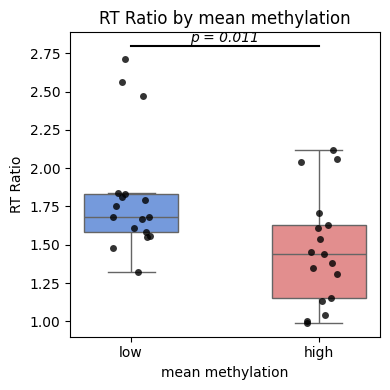

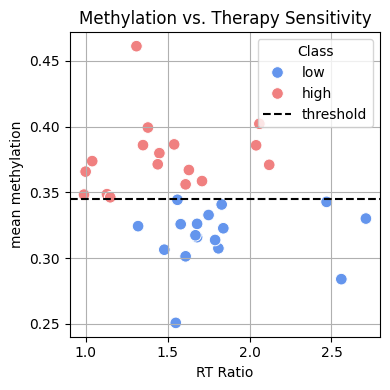

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_sensitivity_vs_methylation(df, therapy_col='RT_Ratio', methyl_col='mean_methylation', threshold=None):
    df = df.copy()

    # Ensure columns are numeric and drop rows with NaNs or non-numeric values
    df[therapy_col] = pd.to_numeric(df[therapy_col], errors='coerce')
    df[methyl_col] = pd.to_numeric(df[methyl_col], errors='coerce')
    df.dropna(subset=[therapy_col, methyl_col], inplace=True)

    # Determine methylation threshold
    if threshold is None:
        threshold = df[methyl_col].median()
    # print(f"MGMT high-low used: {threshold}")

    # Assign methylation class based on threshold
    df['sensitivity'] = np.where(df[methyl_col] <= threshold, 'low', 'high')

    # T-test for p-value: compare THERAPY values between methylation groups (FIXED)
    group1 = df.loc[df['sensitivity'] == 'low', therapy_col]
    group2 = df.loc[df['sensitivity'] == 'high', therapy_col]
    stat, pval = ttest_ind(group1, group2, nan_policy='omit', equal_var=False)

    # Plot: box/strip of therapy by methylation class
    plt.figure(figsize=(4, 4))
    order = ['low', 'high']
    ax = sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,
                     palette={'low': 'cornflowerblue', 'high': 'lightcoral'},
                     width=0.5, fliersize=0)
    sns.stripplot(x='sensitivity', y=therapy_col, data=df, order=order,
                  color='black', jitter=True, dodge=True, size=5, alpha=0.8)

    # Annotate p-value
    y_max = df[therapy_col].max()
    y_min = df[therapy_col].min()
    y_line = y_max + (y_max - y_min) * 0.05
    plt.plot([0, 1], [y_line, y_line], color='black')
    plt.text(0.5, y_line + 0.01, f"p = {pval:.3f}", ha='center', va='bottom', fontsize=10, style='italic')

    # Labels (robust to different column names)
    pretty_therapy = therapy_col.replace('_', ' ')
    plt.ylabel(pretty_therapy)
    plt.xlabel("mean methylation")
    plt.title(f"{pretty_therapy} by mean methylation")
    plt.tight_layout()
    plt.show()

    # Scatter plot: therapy (x) vs methylation (y) with methylation threshold line
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=df,
                    y=methyl_col,
                    x=therapy_col,
                    hue='sensitivity',
                    palette={'low': 'cornflowerblue', 'high': 'lightcoral'},
                    s=70)
    plt.axhline(threshold, color='black', linestyle='--', label='threshold')
    plt.ylabel("mean methylation")
    plt.xlabel(pretty_therapy)
    plt.title("Methylation vs. Therapy Sensitivity")
    plt.legend(title='Class')
    plt.grid(True)
    plt.tight_layout()

plot_sensitivity_vs_methylation(df, therapy_col='RT_Ratio')